# Module: preprocessing

This module contains preprocessing functions.  Preprocessing submodules include preprocess (reshape, bin, and crap data), background (fit and subtract background), and electron_count (electron counting).

## Submodule: background

The notebook demos functions related to background fitting and subtraction.  The demos below include functions for:
* Get streaked background
* Get background subtracted diffraction patterns

In [1]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt

from py4DSTEM.file.datastructure import DiffractionSlice, RealSlice
from py4DSTEM.process.preprocess import get_background_streaks
from py4DSTEM.process.preprocess import get_bksbtr_DP

In [2]:
fp = "/home/ben/Data/20181213_a-Si_TEAM1_shiteng/AmSi_2.h5"
dc = py4DSTEM.file.readwrite.read(fp)

/home/ben/Data/20181213_a-Si_TEAM1_shiteng/AmSi_2.h5 is a py4DSTEM file, v0.3. Reading...


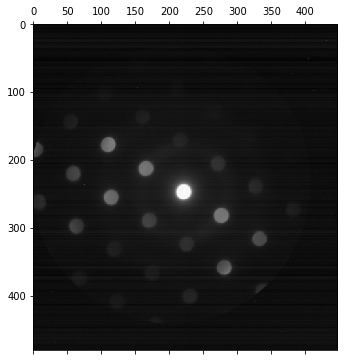

In [3]:
ave_dp = np.average(dc.data4D,axis=(0,1))

fig,ax = plt.subplots(figsize=(6,6)) 
ax.matshow(ave_dp**0.001)
plt.show()

In [40]:
# Get background streaking in the x- and y-directions

bkgrnd_streaks_x = get_background_streaks(datacube=dc,
                                          width=30,          # width of strip on side of DP to average streaks over
                                          N_DPs=50,          # number of random DPs to average
                                          side='end',        # use a strip on the array left/right (top/bottom)
                                          direction='x')     # detect streaks in the x- or y-direction

bkgrnd_streaks_y = get_background_streaks(datacube=dc,
                                          width=30,
                                          N_DPs=50,
                                          side='end',
                                          direction='y')

background = bkgrnd_streaks_x + bkgrnd_streaks_y - np.mean(bkgrnd_streaks_y)  # Subtract mean of one of the two
                                                                              # backgrounds so we don't remove it twice

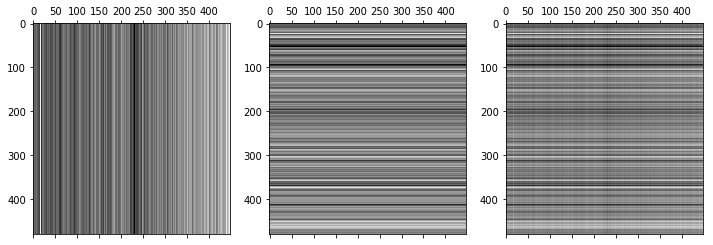

In [41]:
# Show backgrounds

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
ax1.matshow(bkgrnd_streaks_x)
ax2.matshow(bkgrnd_streaks_y)
ax3.matshow(background)
plt.show()

In [45]:
# Get a background subtracted diffraction pattern

Rx,Ry = 50,50

DP_bksbtr = get_bksbtr_DP(dc, background, Rx, Ry)

/home/ben/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


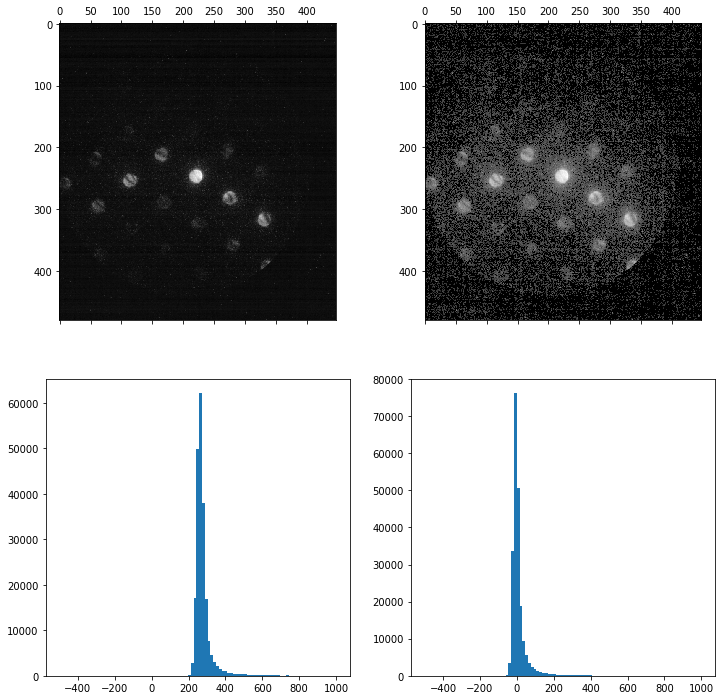

In [49]:
# Compare to original DP

power=0.2

fig,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, figsize=(12,12))
ax11.matshow(dc.data4D[Rx,Ry,:,:]**power)
ax12.matshow(np.where(DP_bksbtr>=0,DP_bksbtr**power,0))
ax21.hist(dc.data4D[Rx,Ry,:,:].ravel(),bins=np.linspace(-500,1000,100))
ax22.hist(DP_bksbtr.ravel(),bins=np.linspace(-500,1000,100))
plt.show()